# Figure 3a

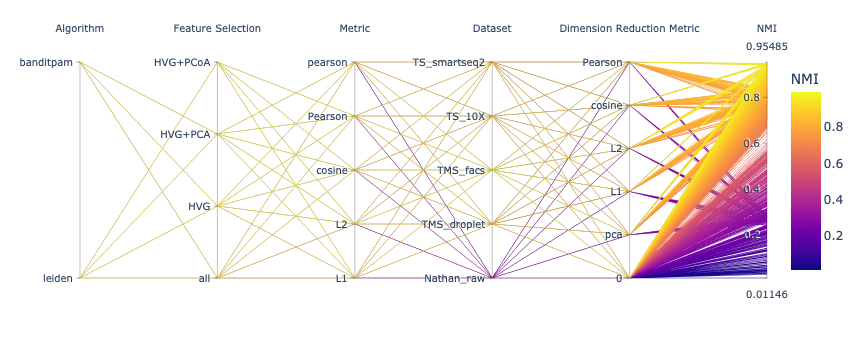

In [89]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import plotly.express as px

# Preprocessing function definition
def preprocess_dataset(filename, dataset_name):
    df = pd.read_csv(filename)
    df['metric'] = df['metric'].apply(lambda x: 'L1' if x == 'l1' else 'L2' if x == 'l2' else 'cosine' if x == 'cos' else 'Pearson' if x == 'correlation' else x)
    df['feature_selection'] = pd.Categorical(df['feature_selection'], categories=['all', 'HVG', 'HVG+PCA'], ordered=True)
    df['dataset'] = dataset_name
    return df

# Dataset paths and names
dataset_paths = [
    ('results_Nathan_raw_0303.csv', 'Nathan_raw'),
    ('results_TMS_droplet_0303.csv', 'TMS_droplet'),
    ('results_TMS_facs_whole_0319.csv', 'TMS_facs'),
    ('results_TS_10X_0323.csv', 'TS_10X'),
    ('results_TS_smartseq2_0323.csv', 'TS_smartseq2')
]

# Load, preprocess, and concatenate all datasets
all_data = pd.concat([preprocess_dataset(path, name) for path, name in dataset_paths], ignore_index=True)

# Load PCoA dataset
result = pd.read_csv('results_PCoA_0410.csv')

# Rename according to the new mappings
result['dataset'] = result['dataset'].replace({
    'TMS_fasq': 'TMS_facs',
    'TMS_drop': 'TMS_droplet',
    'TS_drop': 'TS_10X',
    'nathon': 'Nathan_raw',
    'TS_faasq': 'TS_smartseq2'
})

result['alg_metric'] = result['alg_metric'].apply(lambda x: 'L1' if x == 'l1' else x)
result['alg_metric'] = result['alg_metric'].apply(lambda x: 'L2' if x == 'l2' else x)
result['alg_metric'] = result['alg_metric'].apply(lambda x: 'cosine' if x == 'cos' else x)
result['alg_metric'] = result['alg_metric'].apply(lambda x: 'Pearson' if x == 'correlation' else x)
result['rd_metric'] = result['rd_metric'].apply(lambda x: 'L1' if x == 'l1' else x)
result['rd_metric'] = result['rd_metric'].apply(lambda x: 'L2' if x == 'l2' else x)
result['rd_metric'] = result['rd_metric'].apply(lambda x: 'cosine' if x == 'cos' else x)
result['rd_metric'] = result['rd_metric'].apply(lambda x: 'Pearson' if x == 'correlation' else x)



# Adjust feature_selection and metric based on rd_metric and alg_metric
def adjust_feature_selection(row):
    if row['rd_metric'] == 'pca':
        return 'HVG+PCA', row['alg_metric']
    elif row['rd_metric'] == row['alg_metric']:
        return 'HVG+PCoA', row['alg_metric']
    else:
        return None, None  # for rows that do not match any condition

result[['feature_selection', 'metric']] = result.apply(adjust_feature_selection, axis=1, result_type='expand')

# Drop rows where feature_selection and metric are None
result.dropna(subset=['feature_selection', 'metric'], inplace=True)

# Concatenate all data
all_data = pd.concat([all_data, result], ignore_index=True)

df_plot = all_data.copy()
df_plot['algorithm'] = pd.Categorical(df_plot['algorithm']).codes
df_plot['feature_selection'] = pd.Categorical(df_plot['feature_selection']).codes
df_plot['metric'] = pd.Categorical(df_plot['metric']).codes
df_plot['dataset'] = pd.Categorical(df_plot['dataset']).codes
df_plot['rd_metric'] = pd.Categorical(df_plot['rd_metric']).codes

# Create the parallel coordinates plot
fig = px.parallel_coordinates(df_plot, 
                              color='NMI',
                              dimensions=['algorithm', 'feature_selection', 'metric', 'NMI'],
                              color_continuous_midpoint=0.5)

# Create mappings for categorical data
algorithm_mapping = {alg: i for i, alg in enumerate(all_data['algorithm'].unique())}
feature_selection_mapping = {fs: i for i, fs in enumerate(all_data['feature_selection'].unique())}
metric_mapping = {m: i for i, m in enumerate(all_data['metric'].unique())}
dataset_mapping = {ds: i for i, ds in enumerate(all_data['dataset'].unique())}
rd_metric_mapping = {rm: i for i, rm in enumerate(all_data['rd_metric'].unique())}

# Apply mappings
df_plot = all_data.copy()
df_plot['algorithm'] = df_plot['algorithm'].map(algorithm_mapping)
df_plot['feature_selection'] = df_plot['feature_selection'].map(feature_selection_mapping)
df_plot['metric'] = df_plot['metric'].map(metric_mapping)
df_plot['dataset'] = df_plot['dataset'].map(dataset_mapping)
df_plot['rd_metric'] = df_plot['rd_metric'].map(rd_metric_mapping)

# Create the parallel coordinates plot
fig = px.parallel_coordinates(
    df_plot,
    color='NMI',
    dimensions=['algorithm', 'feature_selection', 'metric', 'dataset', 'rd_metric', 'NMI'],
    labels={'algorithm': 'Algorithm', 'feature_selection': 'Feature Selection', 'metric': 'Metric', 'dataset': 'Dataset', 'rd_metric': 'Dimension Reduction Metric'},
    color_continuous_midpoint=0.5
)

# Reverse mapping for all dimensions
for dim, mapping in zip(fig.data[0].dimensions, [algorithm_mapping, feature_selection_mapping, metric_mapping, dataset_mapping, rd_metric_mapping]):
    reverse_mapping = {v: k for k, v in mapping.items()}
    dim.ticktext = list(reverse_mapping.values())
    dim.tickvals = list(reverse_mapping.keys())

fig.show()

# Figure 3b

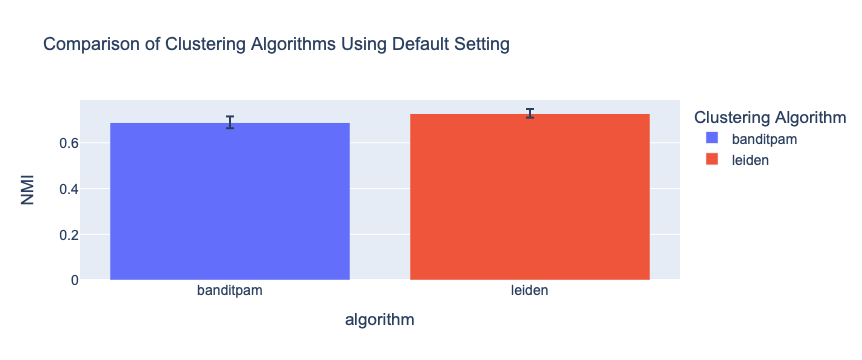

In [98]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import plotly.express as px

# Preprocessing function definition
def preprocess_dataset(filename, dataset_name):
    df = pd.read_csv(filename)
    df['metric'] = df['metric'].apply(lambda x: 'L1' if x == 'l1' else 'L2' if x == 'l2' else 'cosine' if x == 'cos' else 'Pearson' if x == 'correlation' else x)
    df['feature_selection'] = pd.Categorical(df['feature_selection'], categories=['all', 'HVG', 'HVG+PCA'], ordered=True)
    df['dataset'] = dataset_name
    return df

# Dataset paths and names
dataset_paths = [
    ('results_Nathan_raw_0303.csv', 'Nathan_raw'),
    ('results_TMS_droplet_0303.csv', 'TMS_droplet'),
    ('results_TMS_facs_whole_0319.csv', 'TMS_facs'),
    ('results_TS_10X_0323.csv', 'TS_10X'),
    ('results_TS_smartseq2_0323.csv', 'TS_smartseq2')
]

# Load, preprocess, and concatenate all datasets
all_data = pd.concat([preprocess_dataset(path, name) for path, name in dataset_paths], ignore_index=True)

# Load PCoA dataset
result = pd.read_csv('results_PCoA_0410.csv')

# Rename according to the new mappings
result['dataset'] = result['dataset'].replace({
    'TMS_fasq': 'TMS_facs',
    'TMS_drop': 'TMS_droplet',
    'TS_drop': 'TS_10X',
    'nathon': 'Nathan_raw',
    'TS_faasq': 'TS_smartseq2'
})

result['alg_metric'] = result['alg_metric'].apply(lambda x: 'L1' if x == 'l1' else x)
result['alg_metric'] = result['alg_metric'].apply(lambda x: 'L2' if x == 'l2' else x)
result['alg_metric'] = result['alg_metric'].apply(lambda x: 'cosine' if x == 'cos' else x)
result['alg_metric'] = result['alg_metric'].apply(lambda x: 'Pearson' if x == 'correlation' else x)
result['rd_metric'] = result['rd_metric'].apply(lambda x: 'L1' if x == 'l1' else x)
result['rd_metric'] = result['rd_metric'].apply(lambda x: 'L2' if x == 'l2' else x)
result['rd_metric'] = result['rd_metric'].apply(lambda x: 'cosine' if x == 'cos' else x)
result['rd_metric'] = result['rd_metric'].apply(lambda x: 'Pearson' if x == 'correlation' else x)



# Adjust feature_selection and metric based on rd_metric and alg_metric
def adjust_feature_selection(row):
    if row['rd_metric'] == 'pca':
        return 'HVG+PCA', row['alg_metric']
    elif row['rd_metric'] == row['alg_metric']:
        return 'HVG+PCoA', row['alg_metric']
    else:
        return None, None  # for rows that do not match any condition

result[['feature_selection', 'metric']] = result.apply(adjust_feature_selection, axis=1, result_type='expand')

# Drop rows where feature_selection and metric are None
result.dropna(subset=['feature_selection', 'metric'], inplace=True)

# Concatenate all data
all_data = pd.concat([all_data, result], ignore_index=True)

# Function to calculate statistics including confidence interval
def calculate_stats(df):
    df_stats = df.groupby(['algorithm', 'metric']).agg(
        mean_NMI=('NMI', 'mean'),
        std_NMI=('NMI', 'std'),
        n=('NMI', 'count')
    ).reset_index()
    df_stats['sem_NMI'] = df_stats['std_NMI'] / np.sqrt(df_stats['n'])
    # Calculate the t-score for 95% confidence interval
    df_stats['t_score'] = df_stats['n'].apply(lambda x: t.ppf(0.975, x-1))
    df_stats['ci_95'] = df_stats['t_score'] * df_stats['sem_NMI']
    return df_stats

# Filter the data for Leiden and BanditPAM algorithms using L2 metric
filtered_data = all_data[(all_data['metric'] == 'L2') & (all_data['algorithm'].isin(['leiden', 'banditpam']))]

# Calculate statistics for the filtered data
result = calculate_stats(filtered_data)

# Create a bar plot with error bars representing the 95% confidence interval
fig = px.bar(
    result,
    x='algorithm',
    y='mean_NMI',
    error_y='ci_95',
    color='algorithm',
    title='Comparison of Leiden and BanditPAM Algorithms using L2 Metric',
    labels={'mean_NMI': 'Mean NMI', 'ci_95': '95% CI'},
    hover_data=['mean_NMI', 'ci_95']
)

# Customize the layout
fig.update_layout(
    yaxis_title='NMI',
    legend_title_text='Clustering Algorithm',
    title={'text': 'Comparison of Clustering Algorithms Using Default Setting'},
    font=dict(size=14, family='Arial')  # Adjust font size and family globally
)

# Customize the title font separately
fig.update_layout(title_font=dict(size=18, family='Arial'))

# Show the figure
fig.show()

# Figure 4a

4.747112346027742e-13
2.4216098796412624e-13
0.07543548498658471
0.3719109997307174


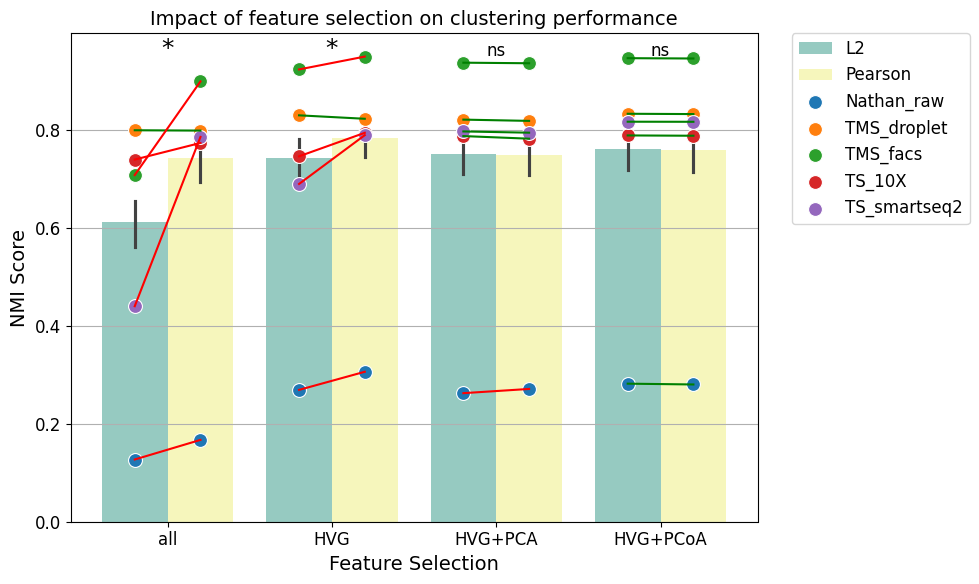

In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Preprocessing function definition
def preprocess_dataset(filename, dataset_name):
    df = pd.read_csv(filename)
    df['metric'] = df['metric'].apply(lambda x: 'L1' if x == 'l1' else 'L2' if x == 'l2' else 'cosine' if x == 'cos' else 'Pearson' if x == 'correlation' else x)
    df = df[df['algorithm'] == 'leiden']
    df = df[df['metric'].isin(['L2', 'Pearson'])]
    df['feature_selection'] = pd.Categorical(df['feature_selection'], categories=['all', 'HVG'], ordered=True)
    df['dataset'] = dataset_name
    return df

# Dataset paths and names
dataset_paths = [
    ('results_Nathan_raw_0303.csv', 'Nathan_raw'),
    ('results_TMS_droplet_0303.csv', 'TMS_droplet'),
    ('results_TMS_facs_whole_0319.csv', 'TMS_facs'),
    ('results_TS_10X_0323.csv', 'TS_10X'),
    ('results_TS_smartseq2_0323.csv', 'TS_smartseq2')
]

# Load, preprocess, and concatenate all datasets
all_data = pd.concat([preprocess_dataset(path, name) for path, name in dataset_paths], ignore_index=True)

result = pd.read_csv('results_PCoA_0410.csv')

# Rename according to the new mappings
result['dataset'] = result['dataset'].replace({
    'TMS_fasq': 'TMS_facs',
    'TMS_drop': 'TMS_droplet',
    'TS_drop': 'TS_10X',
    'nathon': 'Nathan_raw',
    'TS_faasq': 'TS_smartseq2'
})

result['alg_metric'] = result['alg_metric'].apply(lambda x: 'L1' if x == 'l1' else x)
result['alg_metric'] = result['alg_metric'].apply(lambda x: 'L2' if x == 'l2' else x)
result['alg_metric'] = result['alg_metric'].apply(lambda x: 'cosine' if x == 'cos' else x)
result['alg_metric'] = result['alg_metric'].apply(lambda x: 'Pearson' if x == 'correlation' else x)
result['rd_metric'] = result['rd_metric'].apply(lambda x: 'L1' if x == 'l1' else x)
result['rd_metric'] = result['rd_metric'].apply(lambda x: 'L2' if x == 'l2' else x)
result['rd_metric'] = result['rd_metric'].apply(lambda x: 'cosine' if x == 'cos' else x)
result['rd_metric'] = result['rd_metric'].apply(lambda x: 'Pearson' if x == 'correlation' else x)



# Adjust feature_selection and metric based on rd_metric and alg_metric
def adjust_feature_selection(row):
    if row['rd_metric'] == 'pca':
        return 'HVG+PCA', row['alg_metric']
    elif row['rd_metric'] == 'cosine':
        return 'HVG+PCoA', row['alg_metric']
    else:
        return None, None  # for rows that do not match any condition

result[['feature_selection', 'metric']] = result.apply(adjust_feature_selection, axis=1, result_type='expand')

# Drop rows where feature_selection and metric are None
result.dropna(subset=['feature_selection', 'metric'], inplace=True)
result = result[result['metric'].isin(['L2', 'Pearson'])]

# Concatenate all data
all_data = pd.concat([all_data, result], ignore_index=True)

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=all_data, x='feature_selection', y='NMI', hue='metric', dodge=True, palette='Set3', errorbar=('ci', 95))

# Calculate mean NMI scores if missing from your initial setup
mean_nmi_scores = all_data.groupby(['feature_selection', 'metric', 'dataset']).agg({'NMI': 'mean'}).reset_index()

offsets = {'all_L2': -0.2, 'all_Pearson': 0.2, 'HVG_L2': 0.8, 'HVG_Pearson': 1.2, 'HVG+PCA_L2': 1.8, 'HVG+PCA_Pearson': 2.2,'HVG+PCoA_L2': 2.8, 'HVG+PCoA_Pearson': 3.2}

# Apply offsets to the x positions for clarity in plotting
mean_nmi_scores['x'] = mean_nmi_scores['feature_selection'].astype(str) + "_" + mean_nmi_scores['metric']
mean_nmi_scores['x'] = mean_nmi_scores['x'].map(offsets)

# Define unique markers for each dataset
marker_styles = ['o']
dataset_unique = mean_nmi_scores['dataset'].unique()
marker_dict = {dataset: marker_styles[i % len(marker_styles)] for i, dataset in enumerate(dataset_unique)}

# Scatter plot using custom markers
for dataset, marker in marker_dict.items():
    subset = mean_nmi_scores[mean_nmi_scores['dataset'] == dataset]
    sns.scatterplot(data=subset, x='x', y='NMI', marker=marker, s=100, label=dataset, ax=ax, legend=True, zorder=2)
    
# Draw connecting lines
for feature in ['all', 'HVG', 'HVG+PCA', 'HVG+PCoA']:
    for dataset in mean_nmi_scores['dataset'].unique():
        subset = mean_nmi_scores[(mean_nmi_scores['feature_selection'] == feature) & (mean_nmi_scores['dataset'] == dataset)]
        if not subset.empty:
            l2_nmi = subset[subset['metric'] == 'L2']['NMI'].values[0]
            l2_x = offsets[f"{feature}_L2"]
            pearson_nmi = subset[subset['metric'] == 'Pearson']['NMI'].values[0]
            pearson_x = offsets[f"{feature}_Pearson"]
            line_color = 'red' if pearson_nmi > l2_nmi else 'green'
            plt.plot([l2_x, pearson_x], [l2_nmi, pearson_nmi], color=line_color)

# Custom legend for datasets
handles, labels = ax.get_legend_handles_labels()
new_handles = [plt.Line2D([], [], marker=marker_dict[dataset], color='black', linestyle='None', markersize=10) for dataset in dataset_unique]
plt.legend(handles=new_handles, labels=list(dataset_unique), title="Dataset", bbox_to_anchor=(1.05, 1), loc='upper left')

# Paired T-tests and annotating significant results
for feature in ['all', 'HVG', 'HVG+PCA', 'HVG+PCoA']:
    data_l2 = all_data[(all_data['feature_selection'] == feature) & (all_data['metric'] == 'L2')]['NMI']
    data_pearson = all_data[(all_data['feature_selection'] == feature) & (all_data['metric'] == 'Pearson')]['NMI']
    t_stat, p_value = stats.ttest_rel(data_l2, data_pearson)
    print(p_value)
    x_position = (offsets[f"{feature}_L2"] + offsets[f"{feature}_Pearson"]) / 2
    y_position = 0.95
    if p_value < 0.05:
        plt.text(x_position, y_position, '*', fontsize=18, color='black', ha='center')
    else:
        plt.text(x_position, y_position, 'ns', fontsize=12, color='black', ha='center')



plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Impact of feature selection on clustering performance', fontsize=14)
plt.xlabel('Feature Selection', fontsize=14)
plt.ylabel('NMI Score', fontsize=14)
plt.grid(axis = 'y')
plt.tight_layout()
plt.show()

# Figure 4b


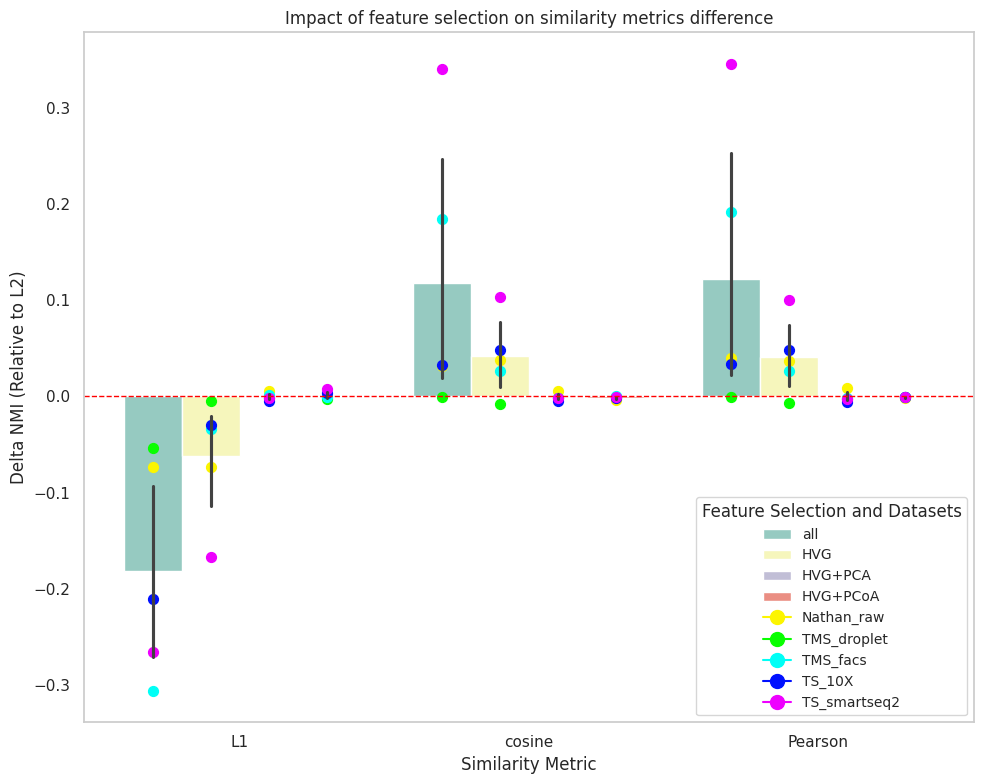

In [143]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.patches as mpatches
from matplotlib.legend import Legend
from matplotlib.lines import Line2D


# Preprocessing function definition
def preprocess_dataset(filename, dataset_name):
    df = pd.read_csv(filename)
    df['metric'] = df['metric'].apply(lambda x: 'L1' if x == 'l1' else 'L2' if x == 'l2' else 'cosine' if x == 'cos' else 'Pearson' if x == 'correlation' else x)
    df = df[df['algorithm'] == 'leiden']
    df['feature_selection'] = pd.Categorical(df['feature_selection'], categories=['all', 'HVG'], ordered=True)
    df['dataset'] = dataset_name
    return df

# Dataset paths and names
dataset_paths = [
    ('results_Nathan_raw_0303.csv', 'Nathan_raw'),
    ('results_TMS_droplet_0303.csv', 'TMS_droplet'),
    ('results_TMS_facs_whole_0319.csv', 'TMS_facs'),
    ('results_TS_10X_0323.csv', 'TS_10X'),
    ('results_TS_smartseq2_0323.csv', 'TS_smartseq2')
]

# Load, preprocess, and concatenate all datasets
all_data = pd.concat([preprocess_dataset(path, name) for path, name in dataset_paths], ignore_index=True)

result = pd.read_csv('results_PCoA_0410.csv')

# Rename according to the new mappings
result['dataset'] = result['dataset'].replace({
    'TMS_fasq': 'TMS_facs',
    'TMS_drop': 'TMS_droplet',
    'TS_drop': 'TS_10X',
    'nathon': 'Nathan_raw',
    'TS_faasq': 'TS_smartseq2'
})

result['alg_metric'] = result['alg_metric'].apply(lambda x: 'L1' if x == 'l1' else x)
result['alg_metric'] = result['alg_metric'].apply(lambda x: 'L2' if x == 'l2' else x)
result['alg_metric'] = result['alg_metric'].apply(lambda x: 'cosine' if x == 'cos' else x)
result['alg_metric'] = result['alg_metric'].apply(lambda x: 'Pearson' if x == 'correlation' else x)
result['rd_metric'] = result['rd_metric'].apply(lambda x: 'L1' if x == 'l1' else x)
result['rd_metric'] = result['rd_metric'].apply(lambda x: 'L2' if x == 'l2' else x)
result['rd_metric'] = result['rd_metric'].apply(lambda x: 'cosine' if x == 'cos' else x)
result['rd_metric'] = result['rd_metric'].apply(lambda x: 'Pearson' if x == 'correlation' else x)



# Adjust feature_selection and metric based on rd_metric and alg_metric
def adjust_feature_selection(row):
    if row['rd_metric'] == 'pca':
        return 'HVG+PCA', row['alg_metric']
    elif row['rd_metric'] == 'cosine':
        return 'HVG+PCoA', row['alg_metric']
    else:
        return None, None  # for rows that do not match any condition

result[['feature_selection', 'metric']] = result.apply(adjust_feature_selection, axis=1, result_type='expand')

# Drop rows where feature_selection and metric are None
result.dropna(subset=['feature_selection', 'metric'], inplace=True)

# Concatenate all data
data = pd.concat([all_data, result], ignore_index=True)

# Calculate delta NMI relative to L2 for each feature selection and metric
pivot = data.pivot_table(index=['dataset', 'feature_selection'], columns='metric', values='NMI')
pivot = pivot.apply(lambda x: x - pivot['L2'], axis=0).drop(columns=['L2'])

# Melt for plotting
melted_data = pivot.melt(ignore_index=False, value_name='delta_NMI', var_name='metric').reset_index()
melted_data['feature_selection'] = pd.Categorical(
    melted_data['feature_selection'],
    categories=['all', 'HVG', 'HVG+PCA', 'HVG+PCoA'],
    ordered=True
)
melted_data['metric'] = pd.Categorical(
    melted_data['metric'],
    categories=['L1', 'cosine', 'Pearson'],
    ordered=True
)
# Plotting
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=melted_data, x='metric', y='delta_NMI', hue='feature_selection', errorbar=('ci', 95), palette='Set3')

# List for storing dot plot handles for legend
dot_legend_handles = []

# Dot positioning and coloring
offsets = {
    'all_L1': -0.3, 'HVG_L1': -0.1, 'HVG+PCA_L1': 0.1, 
    'HVG+PCoA_L1': 0.3, 'all_cosine': 0.7, 'HVG_cosine': 0.9,
    'HVG+PCA_cosine': 1.1, 'HVG+PCoA_cosine': 1.3, 'all_Pearson': 1.7,
    'HVG_Pearson': 1.9, 'HVG+PCA_Pearson': 2.1, 'HVG+PCoA_Pearson': 2.3
}
datasets = melted_data['dataset'].unique()
colors = sns.color_palette("hsv", len(datasets))

for i, dataset in enumerate(datasets):
    for metric in melted_data['metric'].unique():
        for feature in melted_data['feature_selection'].unique():
            subset = melted_data[(melted_data['metric'] == metric) & (melted_data['feature_selection'] == feature)]
            mean_nmi = subset[subset['dataset'] == dataset]['delta_NMI'].mean()
            x_offset = offsets[f"{feature}_{metric}"]
            plt.scatter(x_offset, mean_nmi, color=colors[i], s=50)
            if metric == melted_data['metric'].unique()[0] and feature == melted_data['feature_selection'].unique()[0]:
                dot_legend_handles.append(Line2D([0], [0], marker='o', color=colors[i], label=dataset, markersize=10))


# Perform paired t-tests and annotate significant results
for metric in melted_data['metric'].unique():
    for feature in melted_data['feature_selection'].unique():
        subset = melted_data[(melted_data['metric'] == metric) & (melted_data['feature_selection'] == feature)]
        data_L2 = subset[subset['metric'] == 'L2']['delta_NMI'].dropna()
        data_metric = subset['delta_NMI'].dropna()
        if len(data_L2) == len(data_metric) and len(data_L2) > 0:
            t_stat, p_value = stats.ttest_rel(data_L2, data_metric)
            x_position = offsets[f"{feature}_{metric}"]
            y_position = subset['delta_NMI'].max() + 0.05
            significance = '*' if p_value < 0.05 else 'ns'
            plt.text(x_position, y_position, significance, fontsize=14, ha='center')
            
# Get the handles and labels for the bar plot
handles, labels = ax.get_legend_handles_labels()

# Creating custom legend combining bar and dot legends
legend_elements = handles[:len(melted_data['feature_selection'].cat.categories)] + dot_legend_handles  # Combine bar plot handles and dot plot handles
combined_labels = labels[:len(melted_data['feature_selection'].cat.categories)] + list(datasets)  # Labels for bars and dots

# Place and draw the custom legend
legend = plt.legend(legend_elements, combined_labels, title='Feature Selection and Datasets', loc='lower right', fontsize='small')

plt.title('Impact of feature selection on similarity metrics difference')
plt.xlabel('Similarity Metric')
plt.ylabel('Delta NMI (Relative to L2)')
plt.grid(axis = 'y')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

# Figure 4c

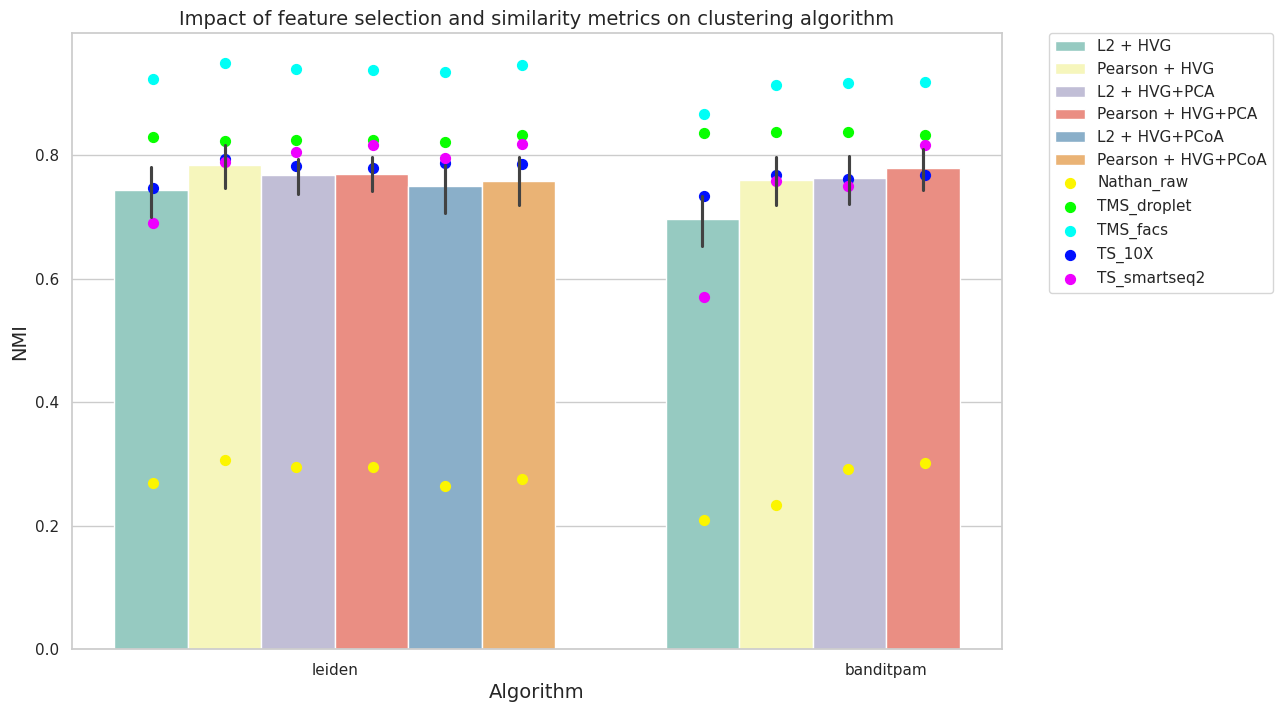

In [174]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

# Function to preprocess and filter the datasets
def preprocess_dataset(filename, dataset_name):
    df = pd.read_csv(filename)
    df['metric'] = df['metric'].apply(lambda x: 'L1' if x == 'l1' else 'L2' if x == 'l2' else 'cosine' if x == 'cos' else 'Pearson' if x == 'correlation' else 'Pearson' if x == 'pearson'else x)
    df['feature_selection'] = pd.Categorical(df['feature_selection'], categories=['all', 'HVG', 'HVG+PCA'], ordered=True)
    df['dataset'] = dataset_name
    return df

# Load and preprocess all datasets
dataset_paths = [
    ('results_Nathan_raw_0303.csv', 'Nathan_raw'),
    ('results_TMS_droplet_0303.csv', 'TMS_droplet'),
    ('results_TMS_facs_whole_0319.csv', 'TMS_facs'),
    ('results_TS_10X_0323.csv', 'TS_10X'),
    ('results_TS_smartseq2_0323.csv', 'TS_smartseq2')
]
all_data = pd.concat([preprocess_dataset(path, name) for path, name in dataset_paths], ignore_index=True)

# Load PCoA datasets
result = pd.read_csv('results_PCoA_0410.csv')

# Rename according to the new mappings
result['dataset'] = result['dataset'].replace({
    'TMS_fasq': 'TMS_facs',
    'TMS_drop': 'TMS_droplet',
    'TS_drop': 'TS_10X',
    'nathon': 'Nathan_raw',
    'TS_faasq': 'TS_smartseq2'
})

result['alg_metric'] = result['alg_metric'].apply(lambda x: 'L1' if x == 'l1' else x)
result['alg_metric'] = result['alg_metric'].apply(lambda x: 'L2' if x == 'l2' else x)
result['alg_metric'] = result['alg_metric'].apply(lambda x: 'cosine' if x == 'cos' else x)
result['alg_metric'] = result['alg_metric'].apply(lambda x: 'Pearson' if x == 'correlation' else x)
result['rd_metric'] = result['rd_metric'].apply(lambda x: 'L1' if x == 'l1' else x)
result['rd_metric'] = result['rd_metric'].apply(lambda x: 'L2' if x == 'l2' else x)
result['rd_metric'] = result['rd_metric'].apply(lambda x: 'cosine' if x == 'cos' else x)
result['rd_metric'] = result['rd_metric'].apply(lambda x: 'Pearson' if x == 'correlation' else x)



# Adjust feature_selection and metric based on rd_metric and alg_metric
def adjust_feature_selection(row):
    if row['rd_metric'] == 'pca':
        return 'HVG+PCA', row['alg_metric']
    elif row['rd_metric'] == row['alg_metric']:
        return 'HVG+PCoA', row['alg_metric']
    else:
        return None, None  # for rows that do not match any condition

result[['feature_selection', 'metric']] = result.apply(adjust_feature_selection, axis=1, result_type='expand')

# Drop rows where feature_selection and metric are None
result.dropna(subset=['feature_selection', 'metric'], inplace=True)

# Concatenate all data
combined_df = pd.concat([all_data, result], ignore_index=True)

# Filtering for visualization
combined_df = combined_df[combined_df['metric'].isin(['L2', 'Pearson']) & combined_df['feature_selection'].isin(['HVG', 'HVG+PCA', 'HVG+PCoA'])]
combined_df['metric_fs'] = combined_df['metric'] + ' + ' + combined_df['feature_selection']

# Filtering for visualization and analysis
comparison_pairs = [
    ('L2 + HVG', 'Pearson + HVG'),
    ('L2 + HVG + PCA', 'Pearson + HVG + PCA'),
    ('L2 + HVG + PCoA', 'Pearson + HVG + PCoA')
]
significance_labels = {}

# Perform paired t-tests for each algorithm and annotate results
for algorithm in ['leiden', 'banditpam']:
    df_alg = combined_df[combined_df['algorithm'] == algorithm]
    for pair in comparison_pairs:
        group1 = df_alg[df_alg['metric_fs'] == pair[0]]['NMI'].dropna()
        group2 = df_alg[df_alg['metric_fs'] == pair[1]]['NMI'].dropna()
        if len(group1) == len(group2) and len(group1) > 0:  # Ensure data is paired
            _, p_value = ttest_rel(group1, group2)
            significance = '*' if p_value < 0.05 else 'ns'
        else:
            significance = 'n/a'
        significance_labels[(algorithm, pair[0], pair[1])] = significance
# Define offsets for dot plotting
offsets = {
    'leiden': {'L2 + HVG': -0.33, 'Pearson + HVG': -0.2, 'L2 + HVG+PCA': -0.07, 'Pearson + HVG+PCA': 0.07, 'L2 + HVG+PCoA': 0.2, 'Pearson + HVG+PCoA': 0.34},
    'banditpam': {'L2 + HVG': 0.67, 'Pearson + HVG': 0.8, 'L2 + HVG+PCA': 0.93, 'Pearson + HVG+PCA': 1.07, 'L2 + HVG+PCoA': 2.3, 'Pearson + HVG+PCoA': 2.7}
}

# Plotting
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=combined_df, x='algorithm', y='NMI', hue='metric_fs', errorbar=('ci', 95), palette='Set3')

# Add dots for the mean NMI per dataset
datasets = combined_df['dataset'].unique()
colors = sns.color_palette("hsv", len(datasets))
dot_legend_handles = []

for dataset in datasets:
    for key, group in combined_df.groupby(['algorithm', 'metric_fs']):
        mean_nmi = group[group['dataset'] == dataset]['NMI'].mean()
        plt.scatter(x=offsets[key[0]][key[1]], y=mean_nmi, color=colors[list(datasets).index(dataset)], label=dataset if key == ('leiden', 'L2 + HVG') else "", s=50)
        if key == ('leiden', 'L2 + HVG'):
            dot_legend_handles.append(Line2D([0], [0], marker='o', color=colors[list(datasets).index(dataset)], label=dataset, markersize=10))

# Creating custom legend
handles, labels = ax.get_legend_handles_labels()
legend_elements = handles[:len(combined_df['metric_fs'].unique())] + dot_legend_handles
plt.legend(legend_elements, labels[:len(combined_df['metric_fs'].unique())] + list(datasets), bbox_to_anchor=(1.05, 1), title='Metrics and Datasets', loc='upper left', fontsize='small', title_fontsize='medium')
plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_title('Impact of feature selection and similarity metrics on clustering algorithm', fontsize = 14)
plt.xlabel('Algorithm', fontsize = 14)
plt.ylabel('NMI', fontsize = 14)
plt.show()

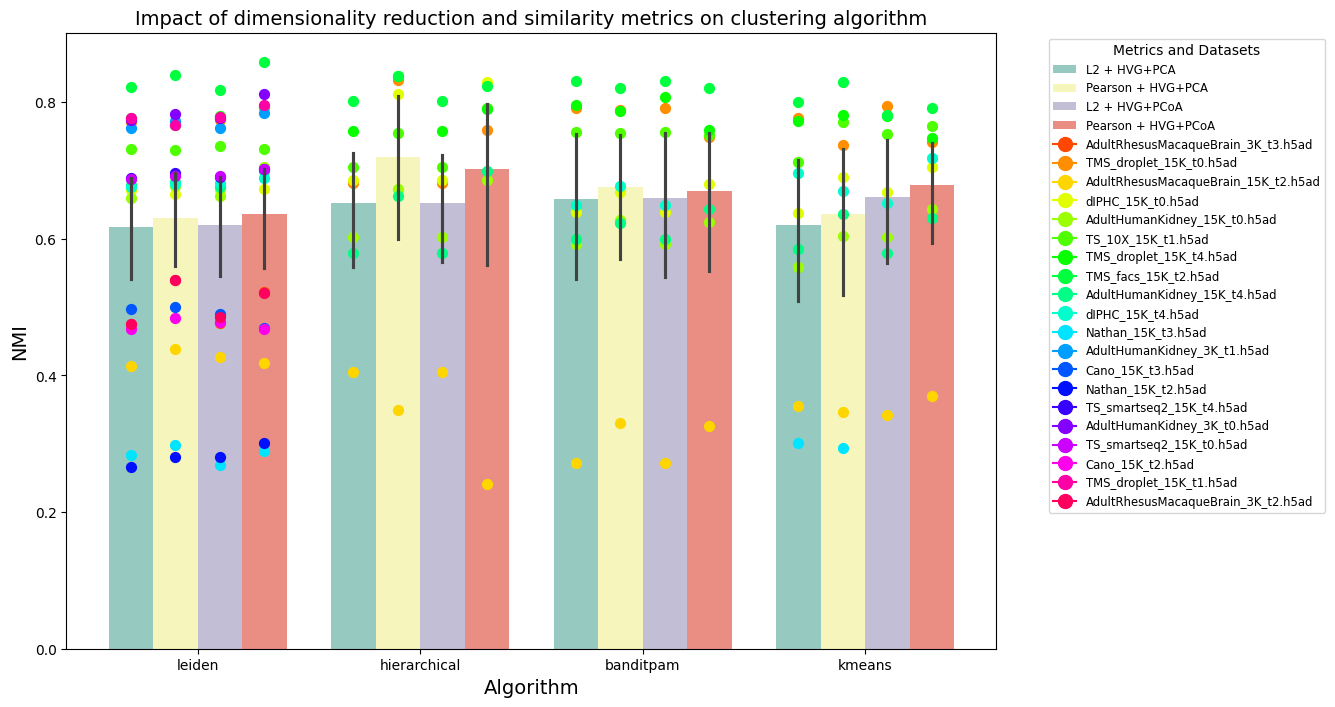

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from matplotlib.lines import Line2D

df_leiden = pd.read_csv('results_leiden_0626_15K_DR.csv')
df_hierarchical = pd.read_csv('results_hierarchical_0626_15K_DR.csv')
df_banditpam = pd.read_csv('results_banditpam_0626_15K_DR.csv')
df_kmeans = pd.read_csv('results_kmeans_0626_15K_DR.csv')

    
# Concatenate the datasets
combined_df = pd.concat([df_leiden, df_hierarchical, df_banditpam, df_kmeans], ignore_index=True)

# Function to adjust feature selection
def adjust_feature_selection(row):
    if row['rd_metric'] == 'pca':
        return 'HVG+PCA', row['alg_metric']
    elif row['rd_metric'] == row['alg_metric']:
        return 'HVG+PCoA', row['alg_metric']
    else:
        return None, None  # for rows that do not match any condition

combined_df['alg_metric'] = combined_df['alg_metric'].apply(lambda x: 'L1' if x == 'l1'  else x)
combined_df['alg_metric'] = combined_df['alg_metric'].apply(lambda x: 'L2' if x == 'l2' else x)
combined_df['alg_metric'] = combined_df['alg_metric'].apply(lambda x: 'cosine' if x == 'cos' else x)
combined_df['alg_metric'] = combined_df['alg_metric'].apply(lambda x: 'Pearson' if x == 'correlation' else x)
combined_df['alg_metric'] = combined_df['alg_metric'].apply(lambda x: 'L1' if x == 'l1_distance'  else x)
combined_df['alg_metric'] = combined_df['alg_metric'].apply(lambda x: 'L2' if x == 'euclidean_distance' else x)
combined_df['alg_metric'] = combined_df['alg_metric'].apply(lambda x: 'cosine' if x == 'cosine' else x)
combined_df['alg_metric'] = combined_df['alg_metric'].apply(lambda x: 'Pearson' if x == 'pearson' else x)
combined_df['rd_metric'] = combined_df['rd_metric'].apply(lambda x: 'L1' if x == 'pcoa_l1' else x)
combined_df['rd_metric'] = combined_df['rd_metric'].apply(lambda x: 'L2' if x == 'pcoa_l2' else x)
combined_df['rd_metric'] = combined_df['rd_metric'].apply(lambda x: 'cosine' if x == 'pcoa_cosine' else x)
combined_df['rd_metric'] = combined_df['rd_metric'].apply(lambda x: 'Pearson' if x == 'pcoa_correlation' else x)

# Apply the function to adjust feature selection
combined_df['feature_selection'], combined_df['alg_metric'] = zip(*combined_df.apply(adjust_feature_selection, axis=1))

# Filtering for visualization
combined_df = combined_df[combined_df['alg_metric'].isin(['L2', 'Pearson']) & combined_df['feature_selection'].isin(['HVG', 'HVG+PCA', 'HVG+PCoA'])]
combined_df['metric_fs'] = combined_df['alg_metric'] + ' + ' + combined_df['feature_selection']


# Filtering for visualization and analysis
comparison_pairs = [
    ('L2 + HVG+PCA', 'Pearson + HVG+PCA'),
    ('L2 + HVG+PCoA', 'Pearson + HVG+PCoA')
]
significance_labels = {}

# Perform paired t-tests for each algorithm and annotate results
for algorithm in ['leiden', 'hierarchical', 'banditpam', 'kmeans']:
    df_alg = combined_df[combined_df['algorithm'] == algorithm]
    for pair in comparison_pairs:
        group1 = df_alg[df_alg['metric_fs'] == pair[0]]['NMI'].dropna()
        group2 = df_alg[df_alg['metric_fs'] == pair[1]]['NMI'].dropna()
        if len(group1) == len(group2) and len(group1) > 0:  # Ensure data is paired
            _, p_value = ttest_rel(group1, group2)
            significance = '*' if p_value < 0.05 else 'ns'
        else:
            significance = 'n/a'
        significance_labels[(algorithm, pair[0], pair[1])] = significance

# Define offsets for dot plotting
offsets = {
    'leiden': {'L2 + HVG+PCA': -0.3, 'Pearson + HVG+PCA': -0.1, 'L2 + HVG+PCoA': 0.1, 'Pearson + HVG+PCoA': 0.3},
    'hierarchical': {'L2 + HVG+PCA': 0.7, 'Pearson + HVG+PCA': 0.9, 'L2 + HVG+PCoA': 1.1, 'Pearson + HVG+PCoA': 1.3,},
    'banditpam' : {'L2 + HVG+PCA': 1.7, 'Pearson + HVG+PCA': 1.9, 'L2 + HVG+PCoA': 2.1, 'Pearson + HVG+PCoA': 2.3},
    'kmeans' : {'L2 + HVG+PCA': 2.7, 'Pearson + HVG+PCA': 2.9, 'L2 + HVG+PCoA': 3.1, 'Pearson + HVG+PCoA': 3.3}
}

# Plotting
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=combined_df, x='algorithm', y='NMI', hue='metric_fs', errorbar=('ci', 95), palette='Set3')

# Add dots for the mean NMI per dataset
datasets = combined_df['dataset'].unique()
colors = sns.color_palette("hsv", len(datasets))
dot_legend_handles = []

for dataset in datasets:
    for key, group in combined_df.groupby(['algorithm', 'metric_fs']):
        mean_nmi = group[group['dataset'] == dataset]['NMI'].mean()
        if pd.notna(mean_nmi):  # Ensure mean_nmi is not NaN
            plt.scatter(x=offsets[key[0]][key[1]], y=mean_nmi, color=colors[list(datasets).index(dataset)], label=dataset if key == ('leiden', 'L2 + HVG') else "", s=50)
            if key == ('leiden', 'L2 + HVG+PCA'):
                dot_legend_handles.append(Line2D([0], [0], marker='o', color=colors[list(datasets).index(dataset)], label=dataset, markersize=10))

# Creating custom legend
handles, labels = ax.get_legend_handles_labels()
unique_labels = {label: handle for label, handle in zip(labels, handles)}

legend_elements = list(unique_labels.values()) + dot_legend_handles
legend_labels = list(unique_labels.keys()) + list(datasets)

plt.legend(legend_elements, legend_labels, bbox_to_anchor=(1.05, 1), title='Metrics and Datasets', loc='upper left', fontsize='small', title_fontsize='medium')

ax.set_title('Impact of dimensionality reduction and similarity metrics on clustering algorithm', fontsize=14)
plt.xlabel('Algorithm', fontsize=14)
plt.ylabel('NMI', fontsize=14)
plt.show()

# Figure 5a

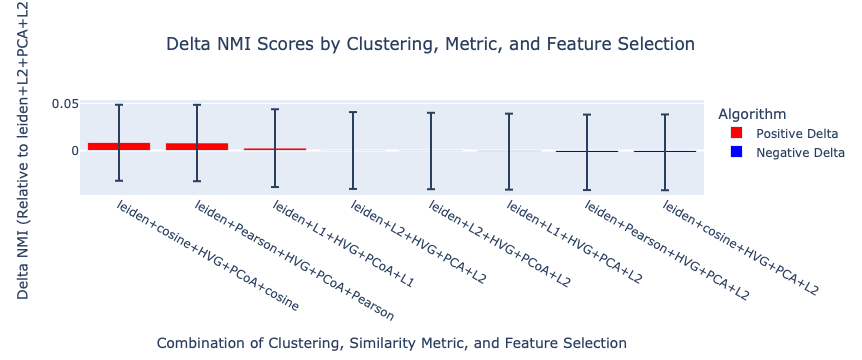

In [175]:
import pandas as pd
import numpy as np
import plotly.express as px
from scipy.stats import t

# Function to preprocess each dataset
def preprocess_dataset(filename, dataset_name):
    df = pd.read_csv(filename)
    df['metric'] = df['metric'].apply(lambda x: 'L1' if x == 'l1' else 'L2' if x == 'l2' else 'cosine' if x == 'cos' else 'Pearson' if x == 'correlation' else x)
    df = df[df['algorithm'] == 'leiden']
    df['feature_selection'] = pd.Categorical(df['feature_selection'], categories=['HVG'], ordered=True)
    df['dataset'] = dataset_name
    return df

# Dataset paths and names
dataset_paths = [
    ('results_Nathan_raw_0303.csv', 'Nathan_raw'),
    ('results_TMS_droplet_0303.csv', 'TMS_droplet'),
    ('results_TMS_facs_whole_0319.csv', 'TMS_facs'),
    ('results_TS_10X_0323.csv', 'TS_10X'),
    ('results_TS_smartseq2_0323.csv', 'TS_smartseq2')
]

# Load and preprocess datasets
all_data = pd.concat([preprocess_dataset(path, name) for path, name in dataset_paths], ignore_index=True)

# Load PCoA dataset
result = pd.read_csv('results_PCoA_0410.csv')

# Rename according to the new mappings
result['dataset'] = result['dataset'].replace({
    'TMS_fasq': 'TMS_facs',
    'TMS_drop': 'TMS_droplet',
    'TS_drop': 'TS_10X',
    'nathon': 'Nathan_raw',
    'TS_faasq': 'TS_smartseq2'
})
result['alg_metric'] = result['alg_metric'].apply(lambda x: 'L1' if x == 'l1' else 'L2' if x == 'l2' else 'cosine' if x == 'cos' else 'Pearson' if x == 'correlation' else x)
result['rd_metric'] = result['rd_metric'].apply(lambda x: 'L1' if x == 'l1' else 'L2' if x == 'l2' else 'cosine' if x == 'cos' else 'Pearson' if x == 'correlation' else x)

# Adjust feature_selection and metric based on rd_metric and alg_metric
def adjust_feature_selection(row):
    if row['rd_metric'] == 'pca':
        return 'HVG+PCA', row['alg_metric']
    elif row['rd_metric'] == row['alg_metric']:
        return 'HVG+PCoA', row['alg_metric']
    else:
        return None, None  # for rows that do not match any condition

result[['feature_selection', 'metric']] = result.apply(adjust_feature_selection, axis=1, result_type='expand')
result.dropna(subset=['feature_selection', 'metric'], inplace=True)

# Concatenate all data
all_data = pd.concat([all_data, result], ignore_index=True)

# Calculate the mean NMI for the standard pipeline for reference
standard_pipeline = all_data[
    (all_data['algorithm'] == 'leiden') &
    (all_data['metric'] == 'L2') &
    (all_data['feature_selection'] == 'HVG+PCA')
]
standard_mean_NMI = standard_pipeline['NMI'].mean()

def calculate_delta_stats(df):
    df_stats = df.groupby(['algorithm', 'feature_selection', 'metric', 'rd_metric']).agg(
        mean_NMI=('NMI', 'mean'),
        std_NMI=('NMI', 'std'),
        n=('NMI', 'count')
    ).reset_index()
    df_stats['sem_NMI'] = df_stats['std_NMI'] / np.sqrt(df_stats['n'])
    df_stats['delta_NMI'] = df_stats['mean_NMI'] - standard_mean_NMI
    df_stats['t_score'] = df_stats['n'].apply(lambda x: t.ppf(0.975, x-1))
    df_stats['ci_95'] = df_stats['t_score'] * df_stats['sem_NMI']
    return df_stats

# Calculate stats and sort by delta_NMI in descending order
result_stats = calculate_delta_stats(all_data)
result_stats = result_stats.sort_values('delta_NMI', ascending=False)

# Add a color column based on the sign of the delta_NMI
result_stats['color'] = result_stats['delta_NMI'].apply(lambda x: 'Positive Delta' if x > 0 else 'Negative Delta')

# Define a function to create custom labels that include rd_metric when applicable
def create_custom_label(row):
    label = f"{row['algorithm']}+{row['metric']}+{row['feature_selection']}"
    if row['feature_selection'] == 'HVG+PCoA':
        label += f"+{row['rd_metric']}"
    elif row['feature_selection'] == 'HVG+PCA':
        label += '+L2'
    return label

# Apply custom label function
result_stats['custom_label'] = result_stats.apply(create_custom_label, axis=1)

# Creating the Plotly figure
fig = px.bar(
    result_stats,
    x='custom_label',
    y='delta_NMI',
    error_y='ci_95',
    title='Delta NMI Scores by Clustering, Metric, and Feature Selection',
    labels={'delta_NMI': 'Delta NMI', 'ci_95': '95% CI'},
    hover_data=['mean_NMI', 'ci_95'],
    color='color',  # Use the color column for bar colors
    color_discrete_map={'Positive Delta': 'red', 'Negative Delta': 'blue'}  # Define specific colors
)

# Customize layout
fig.update_layout(
    xaxis_title='Combination of Clustering, Similarity Metric, and Feature Selection',
    yaxis_title='Delta NMI (Relative to leiden+L2+PCA+L2)',
    xaxis={'categoryorder': 'total descending'},  # Ensure the order is maintained based on delta_NMI
    legend_title_text='Algorithm',
    title_x=0.5  # Center the title
)

# Show the figure
fig.show()

# Figure 5b

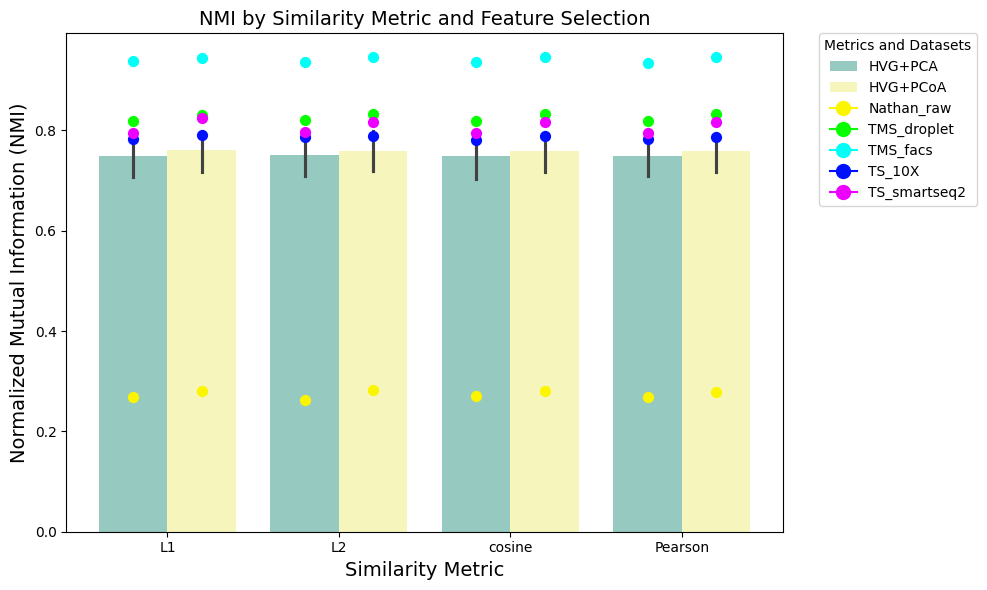

Metric: L1, P-value: 1.9411376923855886e-15, Significance: *
Metric: L2, P-value: 1.1154166407513934e-11, Significance: *
Metric: cosine, P-value: 1.6014742605579938e-15, Significance: *
Metric: Pearson, P-value: 1.4506773036681414e-14, Significance: *


,algorithm,trial,feature_selection,metric,NMI,time,#k,dataset,rd_metric,alg_metric
988,leiden,0,HVG+PCA,L1,0.931625,31.252245,12,TMS_facs,pca,L1
989,leiden,0,HVG+PCA,L2,0.917861,6.534030,13,TMS_facs,pca,L2
990,leiden,0,HVG+PCA,cosine,0.920898,7.414764,13,TMS_facs,pca,cosine
991,leiden,0,HVG+PCA,Pearson,0.924909,7.523328,14,TMS_facs,pca,Pearson
992,leiden,0,HVG+PCoA,L1,0.943469,1.730116,11,TMS_facs,cosine,L1
...,...,...,...,...,...,...,...,...,...,...
1719,leiden,14,HVG+PCA,Pearson,0.794450,1.572104,14,TS_smartseq2,pca,Pearson
1720,leiden,14,HVG+PCoA,L1,0.825937,1.817441,11,TS_smartseq2,cosine,L1
1721,leiden,14,HVG+PCoA,L2,0.815315,1.677373,12,TS_smartseq2,cosine,L2
1722,leiden,14,HVG+PCoA,cosine,0.814397,1.681245,12,TS_smartseq2,cosine,cosine


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Preprocessing function definition
def preprocess_dataset(filename, dataset_name):
    df = pd.read_csv(filename)
    df['metric'] = df['metric'].apply(lambda x: 'L1' if x == 'l1' else 'L2' if x == 'l2' else 'cosine' if x == 'cos' else 'Pearson' if x == 'correlation' else x)
    df = df[df['algorithm'] == 'leiden']
    df['feature_selection'] = pd.Categorical(df['feature_selection'], categories=['all', 'HVG'], ordered=True)
    df['dataset'] = dataset_name
    return df

# Dataset paths and names
dataset_paths = [
    ('results_Nathan_raw_0303.csv', 'Nathan_raw'),
    ('results_TMS_droplet_0303.csv', 'TMS_droplet'),
    ('results_TMS_facs_whole_0319.csv', 'TMS_facs'),
    ('results_TS_10X_0323.csv', 'TS_10X'),
    ('results_TS_smartseq2_0323.csv', 'TS_smartseq2')
]

# Load, preprocess, and concatenate all datasets
all_data = pd.concat([preprocess_dataset(path, name) for path, name in dataset_paths], ignore_index=True)

result = pd.read_csv('results_PCoA_0410.csv')

# Rename according to the new mappings
result['dataset'] = result['dataset'].replace({
    'TMS_fasq': 'TMS_facs',
    'TMS_drop': 'TMS_droplet',
    'TS_drop': 'TS_10X',
    'nathon': 'Nathan_raw',
    'TS_faasq': 'TS_smartseq2'
})

result['alg_metric'] = result['alg_metric'].apply(lambda x: 'L1' if x == 'l1' else x)
result['alg_metric'] = result['alg_metric'].apply(lambda x: 'L2' if x == 'l2' else x)
result['alg_metric'] = result['alg_metric'].apply(lambda x: 'cosine' if x == 'cos' else x)
result['alg_metric'] = result['alg_metric'].apply(lambda x: 'Pearson' if x == 'correlation' else x)
result['rd_metric'] = result['rd_metric'].apply(lambda x: 'L1' if x == 'l1' else x)
result['rd_metric'] = result['rd_metric'].apply(lambda x: 'L2' if x == 'l2' else x)
result['rd_metric'] = result['rd_metric'].apply(lambda x: 'cosine' if x == 'cos' else x)
result['rd_metric'] = result['rd_metric'].apply(lambda x: 'Pearson' if x == 'correlation' else x)



# Adjust feature_selection and metric based on rd_metric and alg_metric
def adjust_feature_selection(row):
    if row['rd_metric'] == 'pca':
        return 'HVG+PCA', row['alg_metric']
    elif row['rd_metric'] == 'cosine':
        return 'HVG+PCoA', row['alg_metric']
    else:
        return None, None  # for rows that do not match any condition

result[['feature_selection', 'metric']] = result.apply(adjust_feature_selection, axis=1, result_type='expand')

# Drop rows where feature_selection and metric are None
result.dropna(subset=['feature_selection', 'metric'], inplace=True)

# Concatenate all data
all_data = pd.concat([all_data, result], ignore_index=True)
all_data = all_data[all_data['feature_selection'].isin(['HVG+PCA', 'HVG+PCoA'])]

# Step 1: Define a consistent color palette
datasets = sorted(all_data['dataset'].unique())  # Sort to ensure consistent order
palette = sns.color_palette("hsv", len(datasets))  # Generate a color palette
color_map = {dataset: color for dataset, color in zip(datasets, palette)}  # Map datasets to colors

# Step 2: Apply this color palette to your plots
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=all_data, x='metric', y='NMI', hue='feature_selection', errorbar=('ci', 95), palette='Set3')

# Custom handles for creating a legend for the datasets
dot_legend_handles = []

# Plotting the mean NMI for each dataset as dots on the bars
offset_dict = {'HVG+PCA': -0.2, 'HVG+PCoA': 0.2}
for i, dataset in enumerate(datasets):
    subset = all_data[all_data['dataset'] == dataset]
    for feature in ['HVG+PCA', 'HVG+PCoA']:
        mean_nmi = subset[subset['feature_selection'] == feature].groupby('metric')['NMI'].mean().reset_index()
        for index, row in mean_nmi.iterrows():
            plt.scatter(x=index + offset_dict[feature], y=row['NMI'], color=color_map[dataset], s=50, zorder=5)
    dot_legend_handles.append(Line2D([0], [0], marker='o', color=color_map[dataset], label=dataset, markersize=10))

# Use the same color map for dot plots
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles + dot_legend_handles, labels=labels + [h.get_label() for h in dot_legend_handles], title="Metrics and Datasets", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('NMI by Similarity Metric and Feature Selection', fontsize = 14)
plt.xlabel('Similarity Metric', fontsize = 14)
plt.ylabel('Normalized Mutual Information (NMI)', fontsize = 14)
plt.tight_layout()
plt.show()

# List of unique similarity metrics to analyze
metrics = all_data['metric'].unique()

# Dictionary to store results
t_test_results = {}

# Loop through each metric and perform paired t-tests
for metric in metrics:
    # Filter data for each feature selection and metric
    data_pca = all_data[(all_data['feature_selection'] == 'HVG+PCA') & (all_data['metric'] == metric)]
    data_pcoa = all_data[(all_data['feature_selection'] == 'HVG+PCoA') & (all_data['metric'] == metric)]

    # Ensure we have paired data by aligning indices
    if len(data_pca) == len(data_pcoa) and not data_pca.empty and not data_pcoa.empty:
        # Performing paired t-test
        t_stat, p_value = stats.ttest_rel(data_pca['NMI'], data_pcoa['NMI'])
        # Determine significance
        significance = '*' if p_value < 0.05 else 'ns'
    else:
        p_value = None
        significance = 'n/a'  # Not applicable if data are unpaired or missing

    # Store results in the dictionary
    t_test_results[metric] = (p_value, significance)

    # Print out the results
    print(f"Metric: {metric}, P-value: {p_value}, Significance: {significance}")
all_data

/tmp/ipykernel_17529/768600687.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['feature_selection'] = df['rd_metric'].apply(lambda x: 'HVG+PCA' if x == 'pca' else 'HVG+PCoA')
/tmp/ipykernel_17529/768600687.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data[['feature_selection', 'alg_metric']] = all_data.apply(adjust_feature_selection, axis=1, result_type='expand')


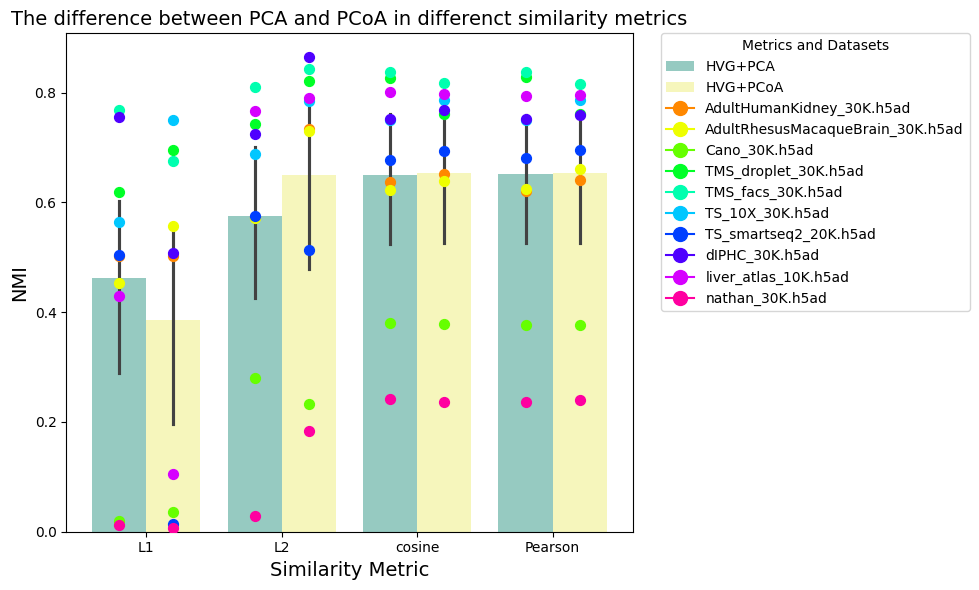

Metric: L1, P-value: 0.2783911984693821, Significance: ns
Metric: L2, P-value: 0.021348201994698862, Significance: *
Metric: cosine, P-value: 0.7525664327216922, Significance: ns
Metric: Pearson, P-value: 0.9886708704808352, Significance: ns
Metric: None, P-value: None, Significance: n/a


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib.lines import Line2D


df_hierarchical = pd.read_csv('results_hierarchical_0619.csv')
df_leiden = pd.read_csv('results_leiden_0618.csv')

# Concatenate the datasets
combined_df = pd.concat([df_leiden, df_hierarchical], ignore_index=True)
combined_df['alg_metric'] = combined_df['alg_metric'].apply(lambda x: 'L1' if x == 'l1' else x)
combined_df['alg_metric'] = combined_df['alg_metric'].apply(lambda x: 'L2' if x == 'l2' else x)
combined_df['alg_metric'] = combined_df['alg_metric'].apply(lambda x: 'cosine' if x == 'cos' else x)
combined_df['alg_metric'] = combined_df['alg_metric'].apply(lambda x: 'Pearson' if x == 'correlation' else x)
combined_df['rd_metric'] = combined_df['rd_metric'].apply(lambda x: 'L1' if x == 'pcoa_l1' else x)
combined_df['rd_metric'] = combined_df['rd_metric'].apply(lambda x: 'L2' if x == 'pcoa_l2' else x)
combined_df['rd_metric'] = combined_df['rd_metric'].apply(lambda x: 'cosine' if x == 'pcoa_cosine' else x)
combined_df['rd_metric'] = combined_df['rd_metric'].apply(lambda x: 'Pearson' if x == 'pcoa_correlation' else x)

# Preprocessing function definition
def preprocess_dataset(df):
    df = df[df['algorithm'] == 'hierarchical']
    df['feature_selection'] = df['rd_metric'].apply(lambda x: 'HVG+PCA' if x == 'pca' else 'HVG+PCoA')
    return df

all_data = preprocess_dataset(combined_df)

def adjust_feature_selection(row):
    if row['rd_metric'] == 'pca':
        return 'HVG+PCA', row['alg_metric']
    elif row['rd_metric'] == 'cosine':
        return 'HVG+PCoA', row['alg_metric']
    else:
        return None, None  # for rows that do not match any condition

all_data[['feature_selection', 'alg_metric']] = all_data.apply(adjust_feature_selection, axis=1, result_type='expand')

# Step 1: Define a consistent color palette
datasets = sorted(all_data['dataset'].unique())  # Sort to ensure consistent order
palette = sns.color_palette("hsv", len(datasets))  # Generate a color palette
color_map = {dataset: color for dataset, color in zip(datasets, palette)}  # Map datasets to colors

# Step 2: Apply this color palette to your plots
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=all_data, x='alg_metric', y='NMI', hue='feature_selection', errorbar=('ci', 95), palette='Set3')

# Custom handles for creating a legend for the datasets
dot_legend_handles = []

# Plotting the mean NMI for each dataset as dots on the bars
offset_dict = {'HVG+PCA': -0.2, 'HVG+PCoA': 0.2}
for i, dataset in enumerate(datasets):
    subset = all_data[all_data['dataset'] == dataset]
    for feature in ['HVG+PCA', 'HVG+PCoA']:
        mean_nmi = subset[subset['feature_selection'] == feature].groupby('alg_metric')['NMI'].mean().reset_index()
        for index, row in mean_nmi.iterrows():
            plt.scatter(x=index + offset_dict[feature], y=row['NMI'], color=color_map[dataset], s=50, zorder=5)
    dot_legend_handles.append(Line2D([0], [0], marker='o', color=color_map[dataset], label=dataset, markersize=10))

# Use the same color map for dot plots
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles + dot_legend_handles, labels=labels + [h.get_label() for h in dot_legend_handles], title="Metrics and Datasets", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('The difference between PCA and PCoA in differenct similarity metrics', fontsize = 14)
plt.xlabel('Similarity Metric', fontsize = 14)
plt.ylabel('NMI', fontsize = 14)
plt.tight_layout()
plt.show()

# List of unique similarity metrics to analyze
metrics = all_data['alg_metric'].unique()

# Dictionary to store results
t_test_results = {}

# Loop through each metric and perform paired t-tests
for metric in metrics:
    # Filter data for each feature selection and metric
    data_pca = all_data[(all_data['feature_selection'] == 'HVG+PCA') & (all_data['alg_metric'] == metric)]
    data_pcoa = all_data[(all_data['feature_selection'] == 'HVG+PCoA') & (all_data['alg_metric'] == metric)]

    # Ensure we have paired data by aligning indices
    if len(data_pca) == len(data_pcoa) and not data_pca.empty and not data_pcoa.empty:
        # Performing paired t-test
        t_stat, p_value = stats.ttest_rel(data_pca['NMI'], data_pcoa['NMI'])
        # Determine significance
        significance = '*' if p_value < 0.05 else 'ns'
    else:
        p_value = None
        significance = 'n/a'  # Not applicable if data are unpaired or missing

    # Store results in the dictionary
    t_test_results[metric] = (p_value, significance)

    # Print out the results
    print(f"Metric: {metric}, P-value: {p_value}, Significance: {significance}")

# Figure 6a

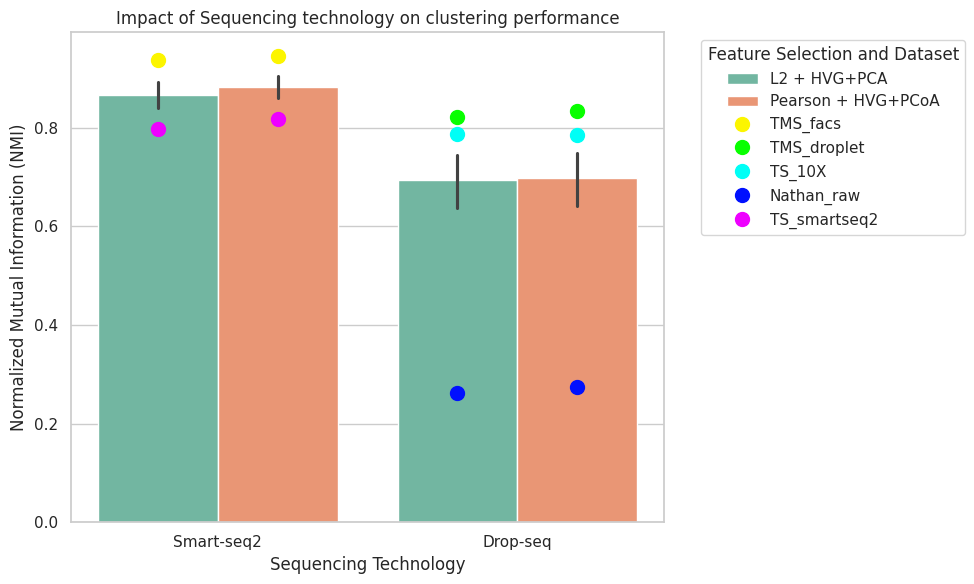

30
30
62
62
Technology: Smart-seq2, P-value: 1.5889117169236436e-07, Significance: *
Technology: Drop-seq, P-value: 0.009501694729410816, Significance: *


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

# Function to preprocess and filter the datasets
def preprocess_dataset(filename, dataset_name):
    df = pd.read_csv(filename)
    df['metric'] = df['metric'].apply(lambda x: 'L1' if x == 'l1' else 'L2' if x == 'l2' else 'cosine' if x == 'cos' else 'Pearson' if x == 'correlation' else 'Pearson' if x == 'pearson'else x)
    df['feature_selection'] = pd.Categorical(df['feature_selection'], categories=['all', 'HVG'], ordered=True)
    df['dataset'] = dataset_name
    return df

# Load and preprocess all datasets
dataset_paths = [
    ('results_Nathan_raw_0303.csv', 'Nathan_raw'),
    ('results_TMS_droplet_0303.csv', 'TMS_droplet'),
    ('results_TMS_facs_whole_0319.csv', 'TMS_facs'),
    ('results_TS_10X_0323.csv', 'TS_10X'),
    ('results_TS_smartseq2_0323.csv', 'TS_smartseq2')
]
all_data = pd.concat([preprocess_dataset(path, name) for path, name in dataset_paths], ignore_index=True)

# Load PCoA datasets
result = pd.read_csv('results_PCoA_0410.csv')

# Rename according to the new mappings
result['dataset'] = result['dataset'].replace({
    'TMS_fasq': 'TMS_facs',
    'TMS_drop': 'TMS_droplet',
    'TS_drop': 'TS_10X',
    'nathon': 'Nathan_raw',
    'TS_faasq': 'TS_smartseq2'
})

result['alg_metric'] = result['alg_metric'].apply(lambda x: 'L1' if x == 'l1' else x)
result['alg_metric'] = result['alg_metric'].apply(lambda x: 'L2' if x == 'l2' else x)
result['alg_metric'] = result['alg_metric'].apply(lambda x: 'cosine' if x == 'cos' else x)
result['alg_metric'] = result['alg_metric'].apply(lambda x: 'Pearson' if x == 'correlation' else x)
result['rd_metric'] = result['rd_metric'].apply(lambda x: 'L1' if x == 'l1' else x)
result['rd_metric'] = result['rd_metric'].apply(lambda x: 'L2' if x == 'l2' else x)
result['rd_metric'] = result['rd_metric'].apply(lambda x: 'cosine' if x == 'cos' else x)
result['rd_metric'] = result['rd_metric'].apply(lambda x: 'Pearson' if x == 'correlation' else x)

# set technology map
technology_map = {
    'Nathan_raw': 'Drop-seq',
    'TMS_droplet': 'Drop-seq',
    'TMS_facs': 'Smart-seq2',
    'TS_10X': 'Drop-seq',
    'TS_smartseq2': 'Smart-seq2'
}

# Adjust feature_selection and metric based on rd_metric and alg_metric
def adjust_feature_selection(row):
    if row['rd_metric'] == 'pca':
        return 'HVG+PCA', row['alg_metric']
    elif row['rd_metric'] == row['alg_metric']:
        return 'HVG+PCoA', row['alg_metric']
    else:
        return None, None  # for rows that do not match any condition

result[['feature_selection', 'metric']] = result.apply(adjust_feature_selection, axis=1, result_type='expand')

# Drop rows where feature_selection and metric are None
result.dropna(subset=['feature_selection', 'metric'], inplace=True)

# Concatenate all data
combined_df = pd.concat([all_data, result], ignore_index=True)

# Filtering for visualization
combined_df = combined_df[combined_df['metric'].isin(['L2', 'Pearson']) & combined_df['feature_selection'].isin(['HVG', 'HVG+PCA', 'HVG+PCoA'])]
combined_df['metric_fs'] = combined_df['metric'] + ' + ' + combined_df['feature_selection']
combined_df['technology'] = combined_df['dataset'].map(technology_map)
combined_df = combined_df[combined_df['algorithm'] == 'leiden']


# Filter DataFrame for specific feature selections
filtered_df = combined_df[combined_df['metric_fs'].isin(['L2 + HVG+PCA', 'Pearson + HVG+PCoA'])]

# Set up the figure and axes for the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create a bar plot
ax = sns.barplot(data=filtered_df, x='technology', y='NMI', hue='metric_fs', palette='Set2', errorbar=('ci', 95))  # ci=None to remove the error bars

# Define offsets to adjust dot positions to avoid overlap
offsets = {'L2 + HVG+PCA': -0.2, 'Pearson + HVG+PCoA': 0.2}
datasets = filtered_df['dataset'].unique()
palette = sns.color_palette("hsv", len(datasets))  # Create a color palette
dataset_color_map = {ds: palette[i] for i, ds in enumerate(datasets)}

# Collect the x-tick labels' texts (get text properties and convert to plain string)
labels = [label.get_text() for label in ax.get_xticklabels()]

# Adding dots for mean NMI
for dataset in datasets:
    for fs in offsets:
        subset = filtered_df[(filtered_df['dataset'] == dataset) & (filtered_df['metric_fs'] == fs)]
        mean_nmi = subset['NMI'].mean()  # Calculate mean NMI
        if not subset.empty:
            # Use label's index from labels list and apply the offset
            pos = labels.index(subset['technology'].iloc[0]) + offsets[fs]
            plt.scatter(pos, mean_nmi, color=dataset_color_map[dataset], s=100, zorder=3)

# Customize legend to include dataset color mapping
handles, labels = ax.get_legend_handles_labels()
custom_handles = [plt.Line2D([], [], marker='o', linestyle='', color=dataset_color_map[ds], label=ds, markersize=10) for ds in datasets]
ax.legend(handles=handles + custom_handles, labels=labels + list(datasets), title='Feature Selection and Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Impact of Sequencing technology on clustering performance')
plt.xlabel('Sequencing Technology')
plt.ylabel('Normalized Mutual Information (NMI)')
plt.tight_layout()
plt.show()

# Group by technology and then perform paired t-tests
technologies = filtered_df['technology'].unique()  # Get all unique technologies
results = {}  # To store the results

for tech in technologies:
    tech_data = filtered_df[filtered_df['technology'] == tech]
    # Extract NMI values for each condition
    data_l2 = tech_data[tech_data['metric_fs'] == 'L2 + HVG+PCA']['NMI']
    data_pearson = tech_data[tech_data['metric_fs'] == 'Pearson + HVG+PCoA']['NMI']
    print(len(data_l2))
    print(len(data_pearson))
    # Ensure data is paired and non-empty
    if len(data_l2) == len(data_pearson) and not data_l2.empty and not data_pearson.empty:
        # Perform paired t-test
        stat, p_value = ttest_rel(data_l2, data_pearson)
        # Check if the result is significant
        if p_value < 0.05:
            results[tech] = (p_value, '*')
        else:
            results[tech] = (p_value, 'ns')
    else:
        results[tech] = (None, 'n/a')  # Not applicable or insufficient data

# Print out the results
for tech, (p_value, sig) in results.items():
    print(f"Technology: {tech}, P-value: {p_value}, Significance: {sig}")

# Figure 6b

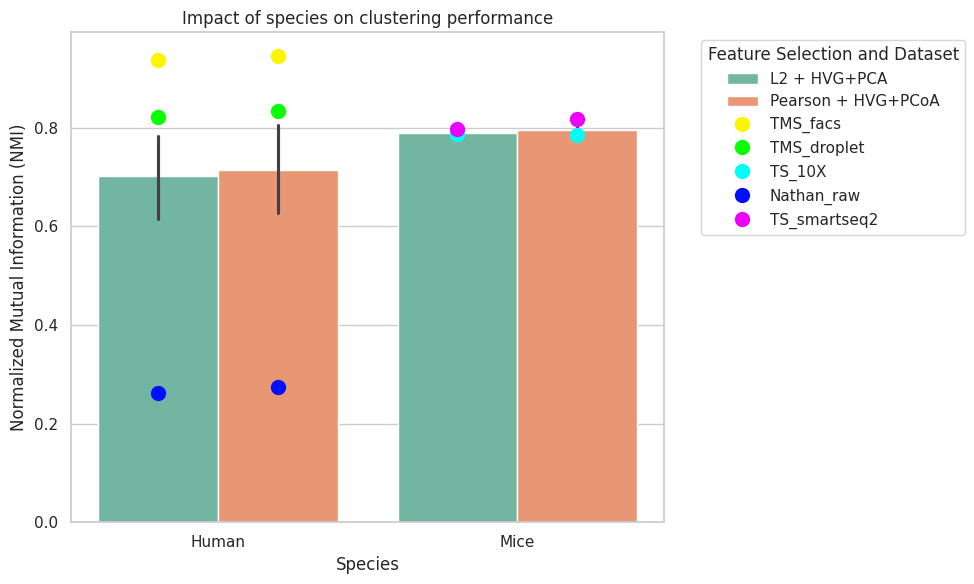

Species: Human, P-value: 1.8042795755391187e-09, Significance: *
Species: Mice, P-value: 0.022458934797989945, Significance: *


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

# Function to preprocess and filter the datasets
def preprocess_dataset(filename, dataset_name):
    df = pd.read_csv(filename)
    df['metric'] = df['metric'].apply(lambda x: 'L1' if x == 'l1' else 'L2' if x == 'l2' else 'cosine' if x == 'cos' else 'Pearson' if x == 'correlation' else 'Pearson' if x == 'pearson'else x)
    df['feature_selection'] = pd.Categorical(df['feature_selection'], categories=['all', 'HVG'], ordered=True)
    df['dataset'] = dataset_name
    return df

# Load and preprocess all datasets
dataset_paths = [
    ('results_Nathan_raw_0303.csv', 'Nathan_raw'),
    ('results_TMS_droplet_0303.csv', 'TMS_droplet'),
    ('results_TMS_facs_whole_0319.csv', 'TMS_facs'),
    ('results_TS_10X_0323.csv', 'TS_10X'),
    ('results_TS_smartseq2_0323.csv', 'TS_smartseq2')
]
all_data = pd.concat([preprocess_dataset(path, name) for path, name in dataset_paths], ignore_index=True)

# Load PCoA datasets
result = pd.read_csv('results_PCoA_0410.csv')

# Rename according to the new mappings
result['dataset'] = result['dataset'].replace({
    'TMS_fasq': 'TMS_facs',
    'TMS_drop': 'TMS_droplet',
    'TS_drop': 'TS_10X',
    'nathon': 'Nathan_raw',
    'TS_faasq': 'TS_smartseq2'
})

result['alg_metric'] = result['alg_metric'].apply(lambda x: 'L1' if x == 'l1' else x)
result['alg_metric'] = result['alg_metric'].apply(lambda x: 'L2' if x == 'l2' else x)
result['alg_metric'] = result['alg_metric'].apply(lambda x: 'cosine' if x == 'cos' else x)
result['alg_metric'] = result['alg_metric'].apply(lambda x: 'Pearson' if x == 'correlation' else x)
result['rd_metric'] = result['rd_metric'].apply(lambda x: 'L1' if x == 'l1' else x)
result['rd_metric'] = result['rd_metric'].apply(lambda x: 'L2' if x == 'l2' else x)
result['rd_metric'] = result['rd_metric'].apply(lambda x: 'cosine' if x == 'cos' else x)
result['rd_metric'] = result['rd_metric'].apply(lambda x: 'Pearson' if x == 'correlation' else x)

# Adjust feature_selection and metric based on rd_metric and alg_metric
def adjust_feature_selection(row):
    if row['rd_metric'] == 'pca':
        return 'HVG+PCA', row['alg_metric']
    elif row['rd_metric'] == row['alg_metric']:
        return 'HVG+PCoA', row['alg_metric']
    else:
        return None, None  # for rows that do not match any condition

result[['feature_selection', 'metric']] = result.apply(adjust_feature_selection, axis=1, result_type='expand')

# Drop rows where feature_selection and metric are None
result.dropna(subset=['feature_selection', 'metric'], inplace=True)

# Concatenate all data
combined_df = pd.concat([all_data, result], ignore_index=True)

# Set species map and filter data
species_map = {
    'Nathan_raw': 'Human',
    'TMS_droplet': 'Human',
    'TMS_facs': 'Human',
    'TS_10X': 'Mice',
    'TS_smartseq2': 'Mice'
}

# Filtering for visualization
combined_df = combined_df[combined_df['metric'].isin(['L2', 'Pearson']) & combined_df['feature_selection'].isin(['HVG', 'HVG+PCA', 'HVG+PCoA'])]
combined_df['metric_fs'] = combined_df['metric'] + ' + ' + combined_df['feature_selection']
combined_df['species'] = combined_df['dataset'].map(species_map)
combined_df = combined_df[combined_df['algorithm'] == 'leiden']

# Filter DataFrame for the specific feature selections of interest
filtered_df = combined_df[combined_df['metric_fs'].isin(['L2 + HVG+PCA', 'Pearson + HVG+PCoA'])]

# Set up the figure and axes for the bar plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create a bar plot
ax = sns.barplot(data=filtered_df, x='species', y='NMI', hue='metric_fs', palette='Set2', errorbar=('ci', 95))  # ci=None to remove error bars

# Plotting mean NMI for each dataset as dots
offsets = {'L2 + HVG+PCA': -0.2, 'Pearson + HVG+PCoA': 0.2}
datasets = filtered_df['dataset'].unique()
palette = sns.color_palette("hsv", len(datasets))
dataset_color_map = {ds: palette[i] for i, ds in enumerate(datasets)}

# Adding dots for mean NMI
for dataset in datasets:
    dataset_subset = filtered_df[filtered_df['dataset'] == dataset]
    for fs in ['L2 + HVG+PCA', 'Pearson + HVG+PCoA']:
        mean_nmi = dataset_subset[dataset_subset['metric_fs'] == fs]['NMI'].mean()
        # Get position for the dot
        if not dataset_subset.empty:
            species_index = list(filtered_df['species'].unique()).index(dataset_subset['species'].iloc[0])
            pos = species_index + offsets[fs]
            plt.scatter(pos, mean_nmi, color=dataset_color_map[dataset], s=100, zorder=3)

# Customize legend to include dataset color mapping
handles, labels = ax.get_legend_handles_labels()
custom_handles = [plt.Line2D([], [], marker='o', linestyle='', color=dataset_color_map[ds], label=ds, markersize=10) for ds in datasets]
ax.legend(handles=handles + custom_handles, labels=labels + list(datasets), title='Feature Selection and Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Impact of species on clustering performance')
plt.xlabel('Species')
plt.ylabel('Normalized Mutual Information (NMI)')
plt.tight_layout()
plt.show()

# Perform and print paired t-tests
for species in ['Human', 'Mice']:
    species_data = filtered_df[filtered_df['species'] == species]
    data_l2 = species_data[species_data['metric_fs'] == 'L2 + HVG+PCA']['NMI'].dropna()
    data_pearson = species_data[species_data['metric_fs'] == 'Pearson + HVG+PCoA']['NMI'].dropna()

    if len(data_l2) == len(data_pearson) and not data_l2.empty and not data_pearson.empty:
        # Performing paired t-test
        stat, p_value = ttest_rel(data_l2, data_pearson)
        significance = '*' if p_value < 0.05 else 'ns'
    else:
        p_value = None
        significance = 'n/a'  # Not applicable if data are unpaired or missing

    print(f"Species: {species}, P-value: {p_value}, Significance: {significance}")

# Figure 6c

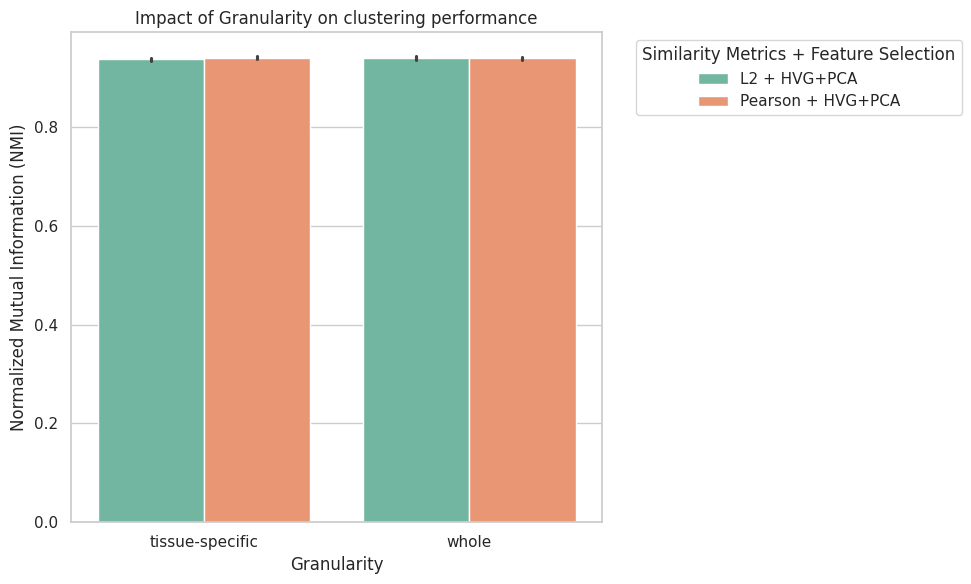

Granularity: tissue-specific, Comparison: L2 + HVG+PCA vs Pearson + HVG+PCA, P-value: 0.11890660509747424, Significance: ns
Granularity: whole, Comparison: L2 + HVG+PCA vs Pearson + HVG+PCA, P-value: 0.48651537797995137, Significance: ns


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Preprocessing function definition
def preprocess_dataset(filename, dataset_name, granularities):
    df = pd.read_csv(filename)
    df['metric'] = df['metric'].apply(lambda x: 'L1' if x == 'l1' else 'L2' if x == 'l2' else 'cosine' if x == 'cos' else 'Pearson' if x == 'correlation' else 'Pearson' if x == 'pearson'else x)
    df = df[df['algorithm'] == 'leiden']
    df['dataset'] = dataset_name
    df = df[df['trial'] < 16]
    df['granularities'] = granularities
    if 'NMI(A)' in df.columns:
        df['NMI'] = df['NMI(A)']
    return df

# Define technology for each dataset
granularity_map = {
    'TMS_facs_tissue': 'tissue-specific',
    'TMS_facs_whole': 'whole',
}

# Dataset paths and names
dataset_paths = [
    ('results_TMS_facs_0220.csv', 'TMS_facs_tissue'),
    ('results_TMS_facs_whole_0319.csv', 'TMS_facs_whole')
]

# Load, preprocess, and concatenate all datasets with technology classification
combined_df = pd.concat([preprocess_dataset(path, name, granularity_map[name]) for path, name in dataset_paths], ignore_index=True)
combined_df = combined_df[combined_df['metric'].isin(['L2', 'Pearson']) & combined_df['feature_selection'].isin(['HVG', 'HVG+PCA'])]
combined_df['metric_fs'] = combined_df['metric'] + ' + ' + combined_df['feature_selection']
combined_df['granularity'] = combined_df['dataset'].map(granularity_map)
combined_df = combined_df[combined_df['algorithm'] == 'leiden']

# Filter DataFrame for specific feature selections
filtered_df = combined_df[combined_df['metric_fs'].isin(['L2 + HVG+PCA', 'Pearson + HVG+PCA'])]

# Set up the figure and axes for the bar plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create a bar plot
ax = sns.barplot(data=filtered_df, x='granularity', y='NMI', hue='metric_fs', palette='Set2',  errorbar=('ci', 95))  # ci=None to avoid error bars

# Customize the plot
ax.set_title('Impact of Granularity on clustering performance')
plt.legend(title='Similarity Metrics + Feature Selection', bbox_to_anchor=(1.05, 1))
plt.xlabel('Granularity')
plt.ylabel('Normalized Mutual Information (NMI)')
plt.tight_layout()
plt.show()

# Perform paired t-tests and print results
comparison_pairs = [
    ('L2 + HVG+PCA', 'Pearson + HVG+PCA')
]

# Dictionary to store and print results
significance_labels = {}

for granularity in ['tissue-specific', 'whole']:
    df_gran = filtered_df[filtered_df['granularity'] == granularity]
    for pair in comparison_pairs:
        group1 = df_gran[df_gran['metric_fs'] == pair[0]]['NMI'].dropna()
        group2 = df_gran[df_gran['metric_fs'] == pair[1]]['NMI'].dropna()
        if len(group1) == len(group2) and len(group1) > 0:  # Ensure data is paired
            t_stat, p_value = ttest_rel(group1, group2)
            significance = '*' if p_value < 0.05 else 'ns'
        else:
            significance = 'n/a'
        significance_labels[(granularity, pair[0], pair[1])] = significance
        # Print each result
        print(f"Granularity: {granularity}, Comparison: {pair[0]} vs {pair[1]}, P-value: {p_value}, Significance: {significance}")

